In [4]:
import numpy as np
import matplotlib.pyplot as plt

def accel(r):
    """Compute gravitational acceleration for N-body system with G=1, m=1."""
    N = r.shape[0]
    a = np.zeros_like(r)
    for i in range(N):
        for j in range(N):
            if i != j:
                diff = r[j] - r[i]
                dist3 = np.linalg.norm(diff)**3
                a[i] += diff / dist3
    return a

def leapfrog(r0, v0, dt, steps):
    r = r0.copy()
    v = v0.copy()
    a = accel(r)
    v_half = v + 0.5 * dt * a
    
    traj_r = np.zeros((steps+1, *r.shape))
    traj_v = np.zeros((steps+1, *v.shape))
    traj_r[0] = r
    traj_v[0] = v
    
    for n in range(1, steps+1):
        r = r + dt * v_half
        a_new = accel(r)
        v_half = v_half + dt * a_new
        v = v_half - 0.5 * dt * a_new
        
        traj_r[n] = r
        traj_v[n] = v
    
    return traj_r, traj_v

def angular_momentum(r, v):
    """Compute total angular momentum (z-component) for planar system."""
    # L = sum_i (x_i * p_{i,y} - y_i * p_{i,x}); m=1 so p=v
    return np.sum(r[:,0] * v[:,1] - r[:,1] * v[:,0], axis=0)

def potential_energy(r):
    """Compute gravitational potential energy U = -sum_{i<j} 1/|r_i - r_j|."""
    N = r.shape[0]
    U = 0.0
    for i in range(N):
        for j in range(i+1, N):
            U += 1.0 / np.linalg.norm(r[j] - r[i])
    return U

def linear_momentum(v):
    """Compute total linear momentum vector P = sum_i v_i."""
    return np.sum(v, axis=0)

def total_energy(r, v):
    """Compute total energy H = T + U."""
    T = 0.5 * np.sum(np.sum(v**2, axis=1))  # Kinetic energy
    U = 3* potential_energy(r)                 # Potential energy (already defined earlier)
    return T - U



# Simulation parameters
dt = 0.001
T = 2 * np.pi
steps = int(T / dt)




z0 = np.array([1.07614373351, 0.46826621840, -0.53807186675, -0.34370682775,
               -1.09960375207, -0.23413310920])

r1 = np.array([z0[0], 0.0])
v1 = np.array([0.0, z0[1]])
r2 = np.array([z0[2], z0[3]])
v2 = np.array([z0[4], z0[5]])
r3 = -(r1 + r2)
v3 = -(v1 + v2)
r0_eight = np.vstack([r1, r2, r3])
v0_eight = np.vstack([v1, v2, v3])

r_traj_e, v_traj_e = leapfrog(r0_eight, v0_eight, dt, steps)
L_e = np.array([angular_momentum(r, v) for r, v in zip(r_traj_e, v_traj_e)])
U_e = np.array([potential_energy(r) for r in r_traj_e])
P_e= np.array([linear_momentum(v) for v in v_traj_e])

H_k = np.array([total_energy(r, v) for r, v in zip(r_traj_k, v_traj_k)])  # Kepler
H_e = np.array([total_energy(r, v) for r, v in zip(r_traj_e, v_traj_e)])  # Figure-Eight


# Plot figure-eight trajectory
plt.figure()
plt.plot(r_traj_e[:,0,0], r_traj_e[:,0,1], label='Body 1')
plt.plot(r_traj_e[:,1,0], r_traj_e[:,1,1], label='Body 2')
plt.plot(r_traj_e[:,2,0], r_traj_e[:,2,1], label='Body 3')
plt.title('Figure-Eight Three-Body Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()
plt.show()

# Plot figure-eight angular momentum over time
plt.figure()
plt.plot(times, L_e)
plt.title('Figure-Eight Choreography: Angular Momentum Conserved')
plt.xlabel('Time')
plt.ylabel('L(t)')
plt.show()

# Plot figure-eight potential energy over time
plt.figure()
plt.plot(times, U_e)
plt.title('Figure-Eight Choreography: Potential Energy')
plt.xlabel('Time')
plt.ylabel('U(t)')
plt.show()

plt.figure()
plt.plot(times, P_e)
plt.title('Figure-Eight Choreography: Angular Momentum Conserved')
plt.xlabel('Time')
plt.ylabel('L(t)')
plt.show()

plt.figure()
plt.plot(times, H_k)
plt.title('Kepler Problem: Total Energy')
plt.xlabel('Time')
plt.ylabel('H(t)')
plt.show()

plt.figure()
plt.plot(times, H_e)
plt.title('Figure-Eight Choreography: Total Energy')
plt.xlabel('Time')
plt.ylabel('H(t)')
plt.show()



NameError: name 'r_traj_k' is not defined

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def pairwise_kepler_energy(r, v):

    E = []
    for i in range(3):
        for j in range(i+1, 3):
            dr = r[i] - r[j]
            dv = v[i] - v[j]
            μ = 0.5
            kin = 0.5 * μ * np.dot(dv, dv)
            pot = -1.0 / np.linalg.norm(dr)
            E.append(kin + pot)
    return np.array(E)


CM = np.array([r.mean(axis=0) for r in r_traj_e])
P_total = np.array([v.sum(axis=0) for v in v_traj_e])


E_pairs = np.array([pairwise_kepler_energy(r, v) for r, v in zip(r_traj_e, v_traj_e)])

# Plot CM drift
plt.figure()
plt.plot(times, CM[:,0], label='CM x')
plt.plot(times, CM[:,1], label='CM y')
plt.title('3-Body Figure-Eight: Center-of-Mass Drift')
plt.xlabel('Time')
plt.ylabel('CM Position')
plt.legend()
plt.grid(True)
plt.show()

# Plot total linear momentum
plt.figure()
plt.plot(times, P_total[:,0], label='P_x')
plt.plot(times, P_total[:,1], label='P_y')
plt.title('3-Body Figure-Eight: Total Linear Momentum')
plt.xlabel('Time')
plt.ylabel('P components')
plt.legend()
plt.grid(True)
plt.show()


plt.figure()
plt.plot(times, E_pairs[:,0], label='E_{12}')
plt.plot(times, E_pairs[:,1], label='E_{13}')
plt.plot(times, E_pairs[:,2], label='E_{23}')
plt.title('3-Body Figure-Eight: Instantaneous Two-Body Kepler Energies')
plt.xlabel('Time')
plt.ylabel('E_{ij}')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'r_traj_e' is not defined

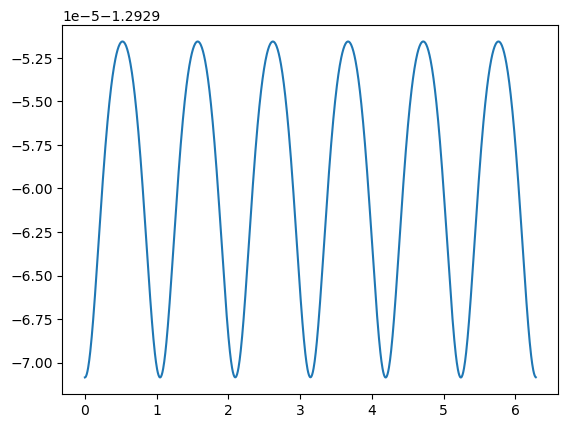

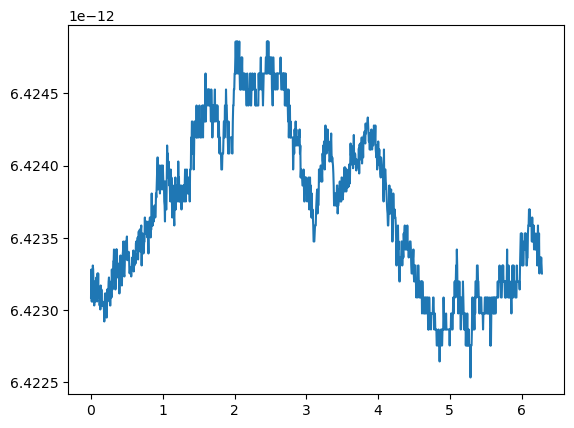

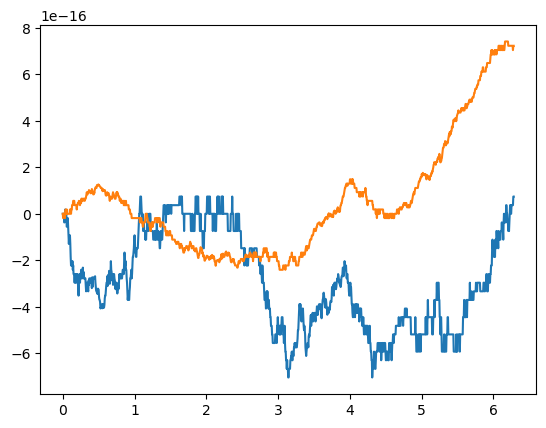

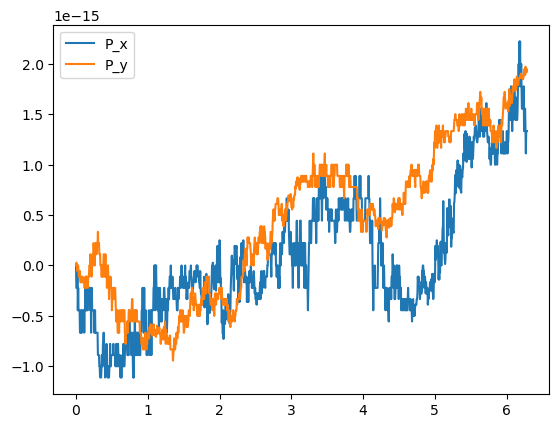

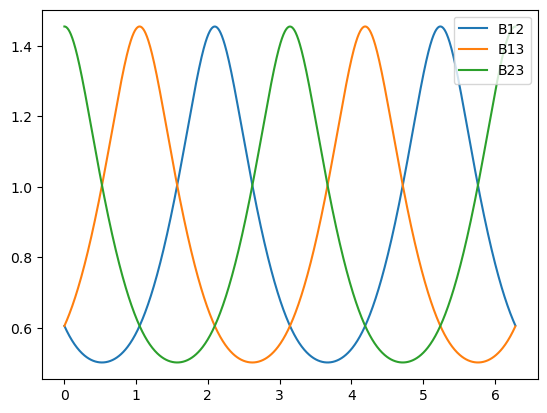

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def accel(r):
    N = r.shape[0]
    a = np.zeros_like(r)
    for i in range(N):
        for j in range(N):
            if i != j:
                diff = r[j] - r[i]
                a[i] += diff / np.linalg.norm(diff)**3
    return a

def leapfrog(r0, v0, dt, steps):
    r, v = r0.copy(), v0.copy()
    a = accel(r)
    v_half = v + 0.5*dt*a
    traj_r = np.zeros((steps+1, *r.shape))
    traj_v = np.zeros((steps+1, *v.shape))
    traj_r[0], traj_v[0] = r, v
    for n in range(1, steps+1):
        r = r + dt*v_half
        a_new = accel(r)
        v_half = v_half + dt*a_new
        v = v_half - 0.5*dt*a_new
        traj_r[n], traj_v[n] = r, v
    return traj_r, traj_v

def total_energy(r, v):
    T = 0.5*np.sum(v**2) #m=1
    U = sum(1/np.linalg.norm(r[j]-r[i])
             for i in range(len(r)) for j in range(i+1,len(r)))
    return T - U

def angular_momentum(r,v):
    return np.sum(r[:,0]*v[:,1] - r[:,1]*v[:,0])

def pairwise_kepler_potential(r):
    U = []
    for i in range(3):
        for j in range(i + 1, 3):
            dr = r[i] - r[j]
            pot = 1 / np.linalg.norm(dr)
            U.append(pot)
    return np.array(U)


# parameters
dt = 0.5*1e-2
T = 2*np.pi
steps = int(T/dt)
times = np.linspace(0, T, steps+1)



z0 = [1.07614373351,0.46826621840,
      -0.53807186675,-0.34370682775,
      -1.09960375207,-0.23413310920]
r1,v1 = np.array([z0[0],0]), np.array([0,z0[1]])
r2,v2 = np.array([z0[2],z0[3]]), np.array([z0[4],z0[5]])
r3,v3 = -(r1+r2), -(v1+v2)
r0_e, v0_e = np.vstack([r1,r2,r3]), np.vstack([v1,v2,v3])
r_e, v_e = leapfrog(r0_e, v0_e, dt, steps)
H_e = np.array([total_energy(r,v) for r,v in zip(r_e, v_e)])
L_e = np.array([angular_momentum(r,v) for r,v in zip(r_e, v_e)])
CM   = np.array([r.mean(0) for r in r_e])
Ptot = np.array([v.sum(0)    for v in v_e])
pot= np.array([pairwise_kepler_potential(r) for r,v in zip(r_e, v_e)])

# --- now the plots ---
plt.figure()
#plt.plot(times, H_k, label='2-body Kepler H')
plt.plot(times, H_e, label='3-body Eight H')
#plt.legend(); plt.title("Total Energy (Drift ≃ 0)"); 
#plt.grid()
plt.savefig('energy_eight.pdf') 
plt.show()

plt.figure()
plt.plot(times, L_e); 
#plt.title("Eight: Total Angular Momentum"); 
#plt.grid(); 
plt.savefig('total_angular_mom.pdf')
plt.show()

plt.figure()
plt.plot(times, CM[:,0], label='CM x')
plt.plot(times, CM[:,1], label='CM y')
#plt.legend(); plt.title("Eight: Center-of-Mass (≈0)"); 
#plt.grid(); 
plt.savefig('center_of_mass.pdf')
plt.show()

plt.figure()
plt.plot(times, Ptot[:,0], label='P_x')
plt.plot(times, Ptot[:,1], label='P_y')
plt.legend(); 
# plt.title("Eight: Total Linear Momentum (≈0)"); plt.grid(); 
plt.savefig('total_lin_momentum.pdf')
plt.show()

plt.figure()
plt.plot(times, pot[:,0], label='B12')
plt.plot(times, pot[:,1], label='B13')
plt.plot(times, pot[:,2], label='B23')
plt.legend(); 
# plt.title("Eight: Instantaneous 2-body Kepler Energies"); plt.grid(); 
plt.savefig('kepler_potential.pdf')
plt.show()


In [17]:
import numpy as np
from scipy.integrate import solve_ivp

def accel(t, r):
    N = r.shape[0]
    a = np.zeros_like(r)
    for i in range(N):
        for j in range(N):
            if i != j:
                diff = r[j] - r[i]
                a[i] += diff / np.linalg.norm(diff)**3
    return a

# One period
T = 2*np.pi
t_span = (0, T)


x1, y1 = 1.07614373351, 0.0
vx1, vy1 = 0.0, 0.46826621840
#x1, y1 = 1.1, 0.0
#vx1, vy1 = 0.0, 0.5
x2, y2 = -0.53807186675, -0.34370682775
vx2, vy2 = -1.09960375207, -0.23413310920

x3, y3 = -(x1 + x2), -(y1 + y2)
vx3, vy3 = -(vx1 + vx2), -(vy1 + vy2)
r0 = np.array([[x1, y1], [x2, y2], [x3, y3]])  # shape (3,2)
v0 = np.array([[vx1, vy1], [vx2, vy2], [vx3, vy3]])  # shape (3,2)
y0 = np.hstack((r0.flatten(), v0.flatten()))  # shape (12,)



sol0 = solve_ivp(accel, t_span, y0, rtol=1e-12, atol=1e-12, method='DOP853')
phi0 = sol0.y[:,-1]


n = y0.size
eps = 1e-5
M = np.zeros((n,n))
for i in range(n):
    dy = np.zeros(n); dy[i]=eps
    sol = solve_ivp(accel, t_span, y0+dy, rtol=1e-12, atol=1e-12, method='RK45')
    M[:,i] = (sol.y[:,-1] - phi0)/eps

n = 12
J = np.block([
    [np.zeros((6,6)), np.eye(6)],
    [-np.eye(6), np.zeros((6,6))]
])


# check M^T J M ≈ J
res = M.T @ J @ M - J
print("Max |M^T J M – J| =", np.max(np.abs(res)))



/var/folders/_s/6dth5vq92x592870nqdgg1v40000gn/T/ipykernel_46980/2869591313.py:10: RuntimeWarning: invalid value encountered in scalar divide
  a[i] += diff / np.linalg.norm(diff)**3


KeyboardInterrupt: 

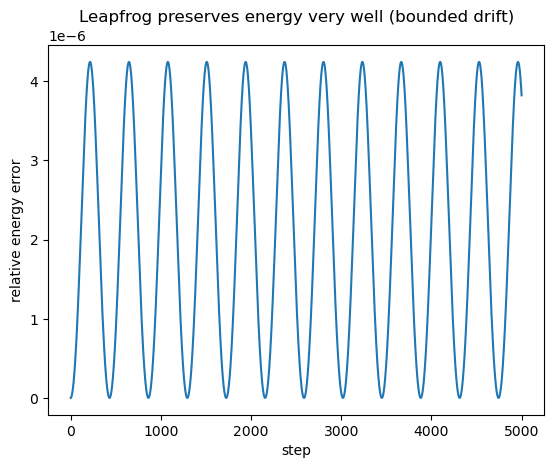

In [31]:
import numpy as np

def accel(r):

    N = r.shape[0]
    a = np.zeros_like(r)
    for i in range(N):
        for j in range(N):
            if i == j: 
                continue
            diff = r[j] - r[i]
            a[i] += diff / np.linalg.norm(diff)**3
    return a

def total_energy(r, v):

    T = 0.5 * np.sum(v**2)
    U = 0.0
    N = r.shape[0]
    for i in range(N):
        for j in range(i+1, N):
            U -= 1.0/np.linalg.norm(r[j] - r[i])
    return T + U

def leapfrog(r0, v0, dt, n_steps):

    r = r0.copy()
    v = v0.copy()
    energies = np.zeros(n_steps)
    
    for k in range(n_steps):
        # half-kick
        v += 0.5 * dt * accel(r)
        # drift
        r += dt * v
        # half-kick
        v += 0.5 * dt * accel(r)
        
        energies[k] = total_energy(r, v)
    
    return r, v, energies


if __name__ == "__main__":
    # two‐body example in 2D
    r0 = np.array([[ 0.5,  0.0, 0.0],
                   [-0.5,  0.0, 0.0]])
    v0 = np.array([[ 0.0,  0.7, 0.0],
                   [ 0.0, -0.7, 0.0]])
    dt      = 0.01
    n_steps = 5000

    r_final, v_final, E = leapfrog(r0, v0, dt, n_steps)


    import matplotlib.pyplot as plt
    plt.plot((E - E[0]) / E[0])
    plt.xlabel("step")
    plt.ylabel("relative energy error")
    plt.title("Leapfrog preserves energy very well (bounded drift)")
    plt.show()




In [35]:
import numpy as np

def pack(r, v):
    return np.concatenate([r.ravel(), v.ravel()])

def unpack(x):
    N3 = x.size // 2
    r = x[:N3].reshape(-1, 3)
    v = x[N3:].reshape(-1, 3)
    return r, v

def accel(r):
    N = r.shape[0]
    a = np.zeros_like(r)
    for i in range(N):
        for j in range(N):
            if i != j:
                diff = r[j] - r[i]
                a[i] += diff / np.linalg.norm(diff)**3
    return a

def leapfrog_step(x, dt):

    r, v = unpack(x)
    v_half = v + 0.5 * dt * accel(r)
    r_new  = r +     dt * v_half
    v_new  = v_half + 0.5 * dt * accel(r_new)
    return pack(r_new, v_new)

def check_symplecticity(phi, x0, dt, eps=1e-6):
    """
    Numerically approximate J = D(phi)(x0) by forward differences,
    then compute || J^T Omega J - Omega ||_F.
    """
    n = x0.size
    # Build Symplectic matrix Omega
    N2 = n // 2
    Omega = np.block([[np.zeros((N2,N2)), np.eye(N2)],
                      [-np.eye(N2),       np.zeros((N2,N2))]])
    # Allocate Jacobian
    J = np.zeros((n, n))
    # Compute phi(x0) baseline
    phi0 = phi(x0, dt)
    # Finite differences: column j of J
    for j in range(n):
        dx = np.zeros(n)
        dx[j] = eps
        phijp = phi(x0 + dx, dt)
        J[:, j] = (phijp - phi0) / eps

    # Symplectic test
    Delta = J.T @ Omega @ J - Omega
    return np.linalg.norm(Delta, ord='fro'), Delta

if __name__ == "__main__":
    # Initial eight orbit
    x1, y1 = 1.07614373351, 0.0
    vx1, vy1 = 0.0, 0.46826621840
    #x1, y1 = 1.1, 0.0
    #vx1, vy1 = 0.0, 0.5
    x2, y2 = -0.53807186675, -0.34370682775
    vx2, vy2 = -1.09960375207, -0.23413310920
    # Third body ensures center of mass at origin
    x3, y3 = -(x1 + x2), -(y1 + y2)
    vx3, vy3 = -(vx1 + vx2), -(vy1 + vy2)
    r0 = np.array([[x1, y1], [x2, y2], [x3, y3]])  # shape (3,2)
    v0 = np.array([[vx1, vy1], [vx2, vy2], [vx3, vy3]])  # shape (3,2)
    y0 = np.hstack((r0.flatten(), v0.flatten()))  # shape (12,)
    z0 = pack(r0, v0)
    dt = 1e-3

    norm_residual, Delta = check_symplecticity(leapfrog_step, z0, dt)
    print(f"||Df^TJDf − J|| = {norm_residual:.2e}")


||Df^TJDf − J|| = 1.23e-09
